In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [41]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5)

from AugmentedNet.score_parser import parseScore
from AugmentedNet.input_representations import Bass19, Chromagram19, Bass35, Chromagram35, MeasureNoteOnset14

In [42]:
def _plot_array(arr):
    plt.pcolor(arr.T, edgecolors="k", linewidth=1, cmap="tab20")
    plt.show()

In [43]:
score = "claraschumann-simple.mxl"
df = parseScore(score)
df = df.iloc[:100]

In [44]:
bass19 = Bass19(df)
bass35 = Bass35(df)
chroma19 = Chromagram19(df)
chroma35 = Chromagram35(df)
duration14 = MeasureNoteOnset14(df)

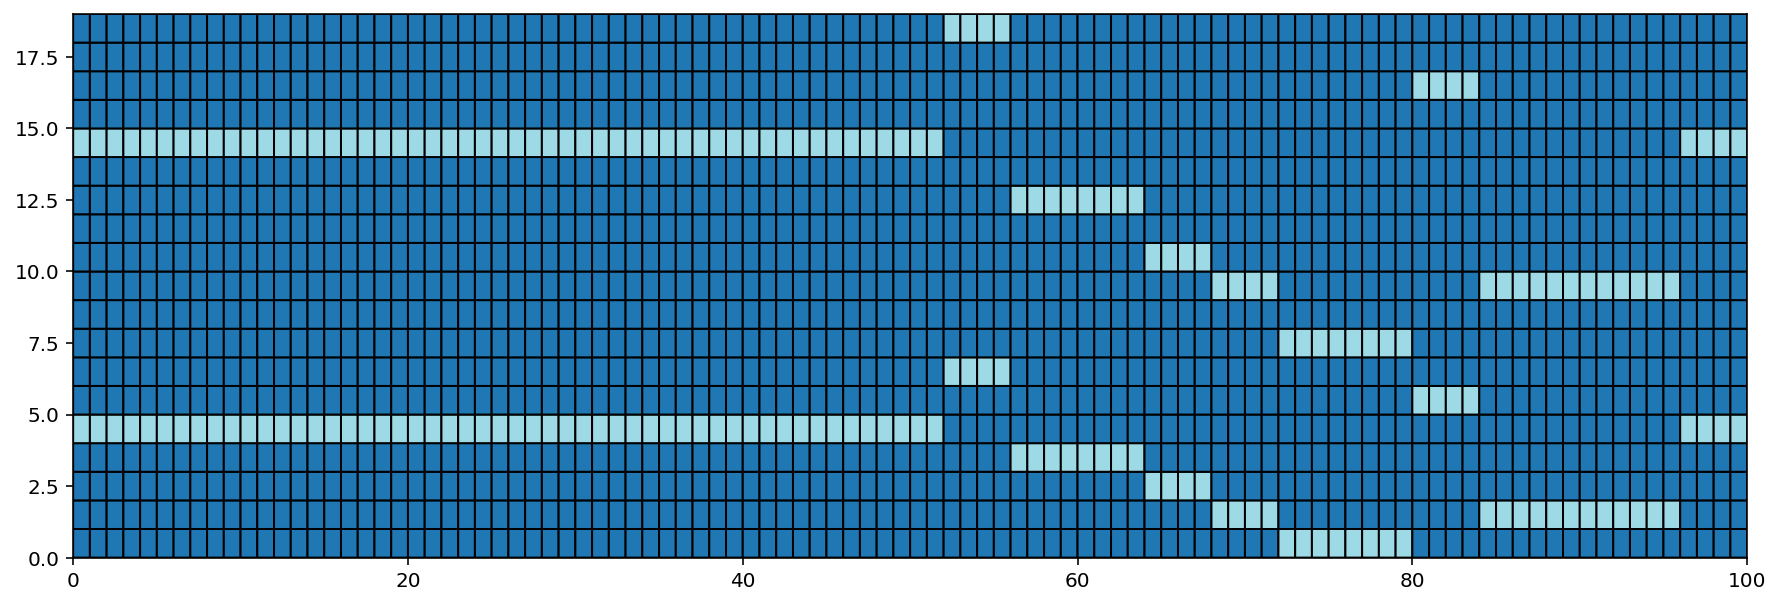

In [36]:
_plot_array(bass19.array)

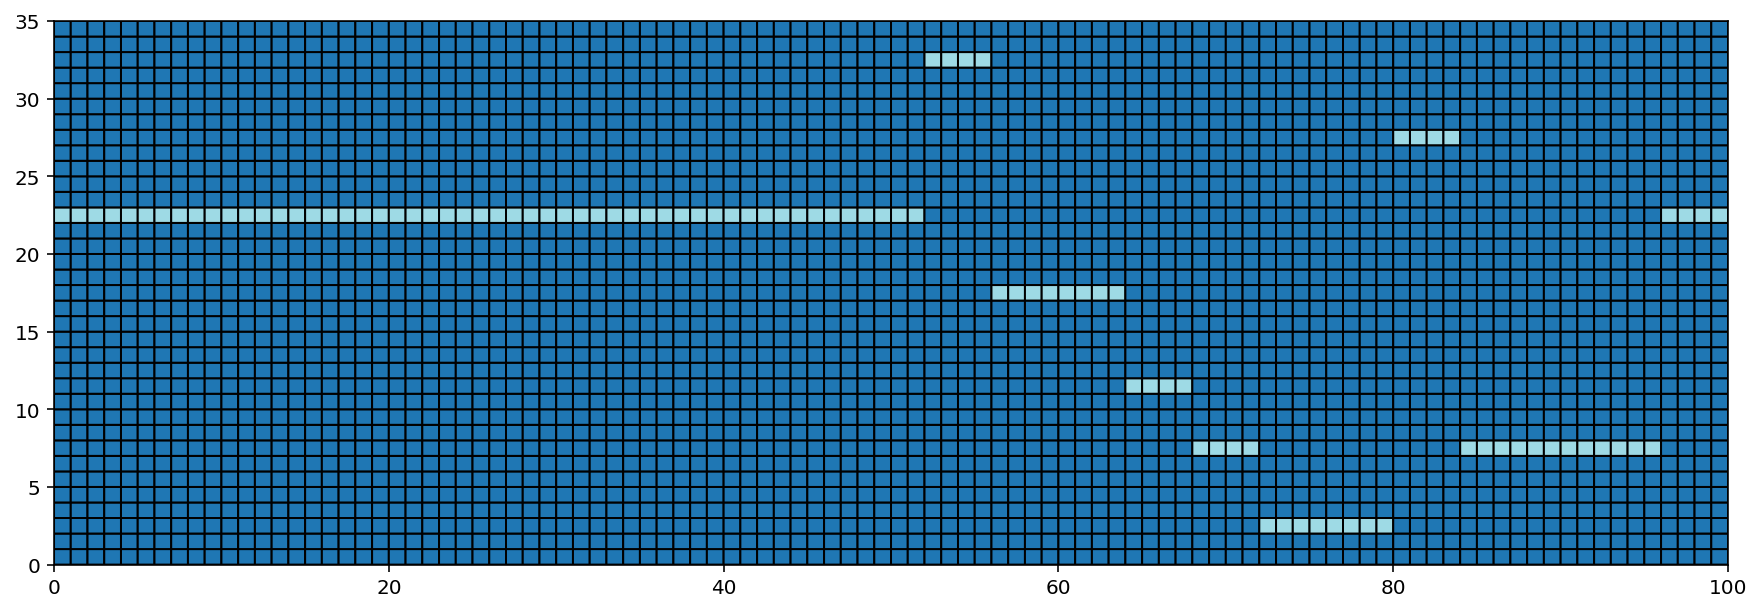

In [37]:
_plot_array(bass35.array)

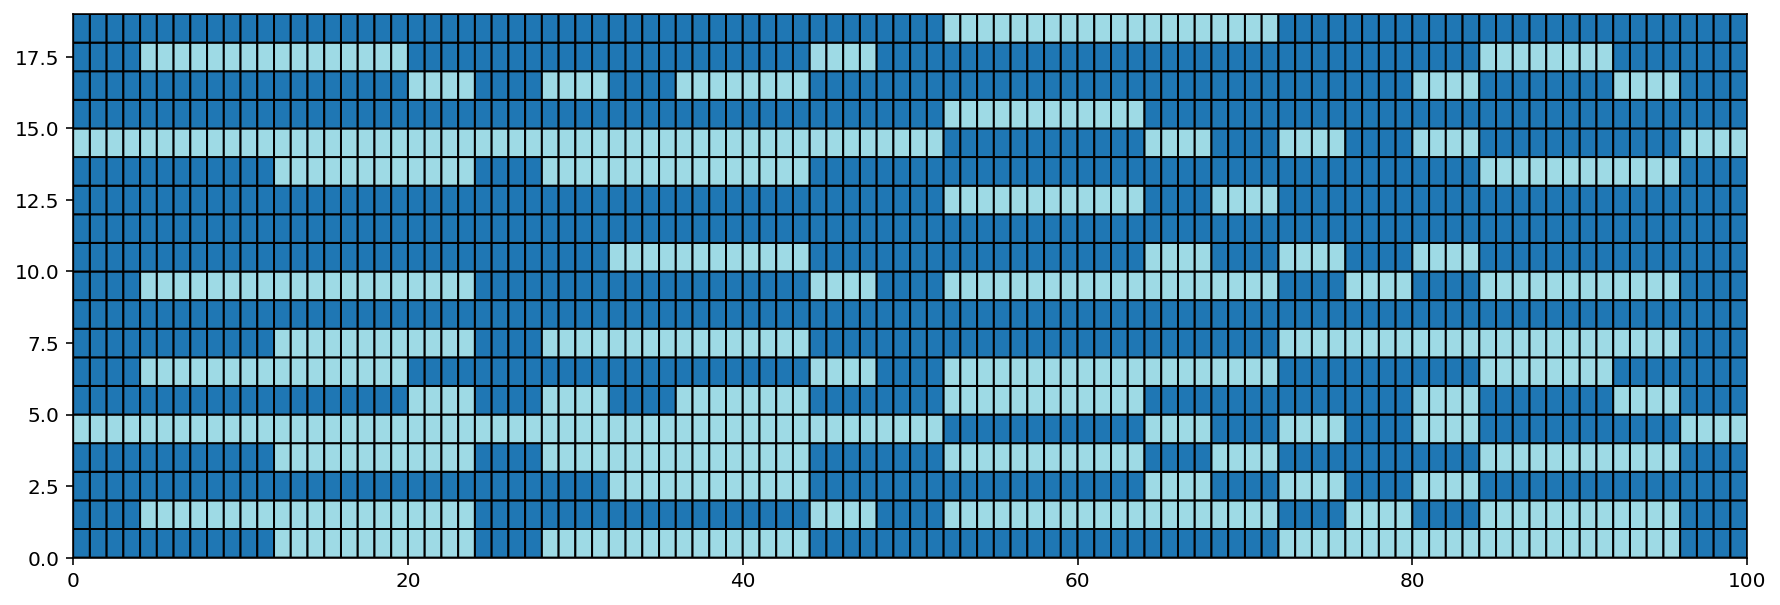

In [38]:
_plot_array(chroma19.array)

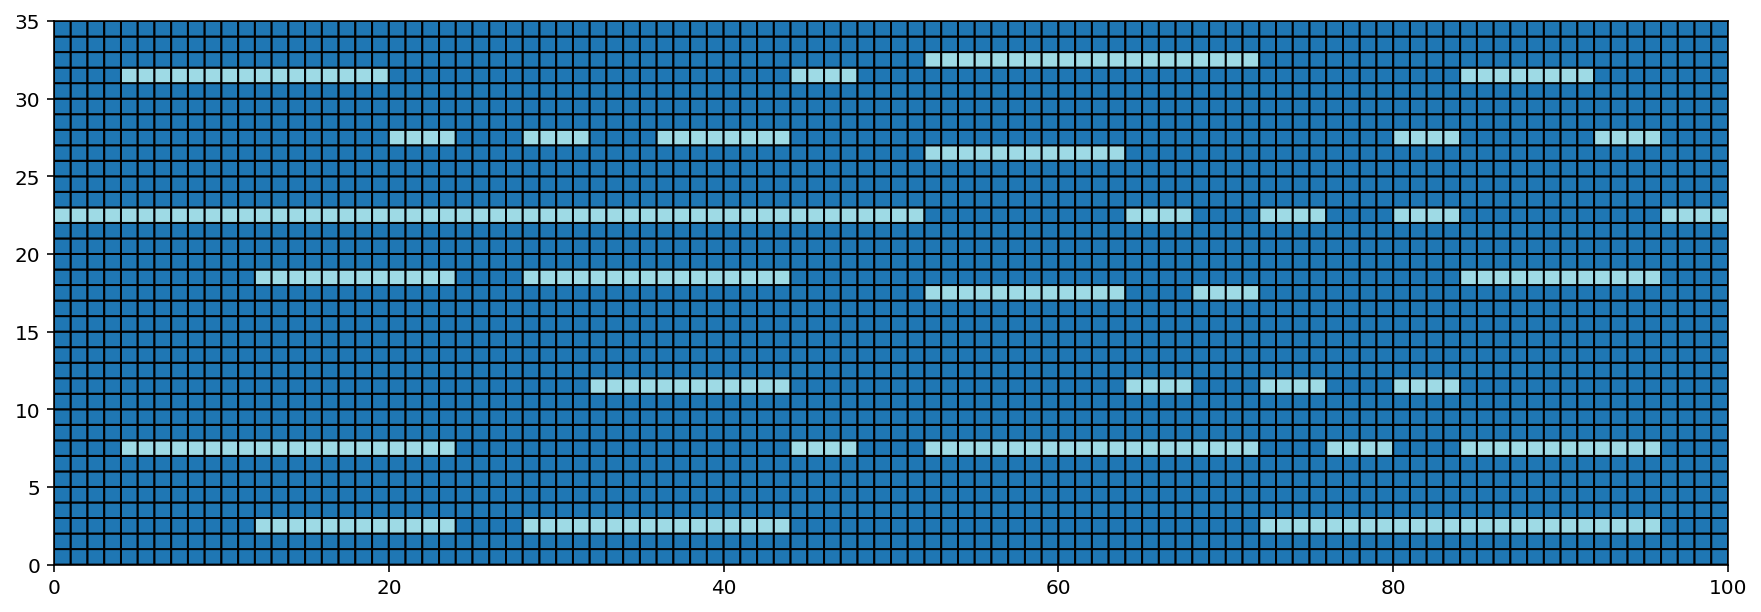

In [39]:
_plot_array(chroma35.array)

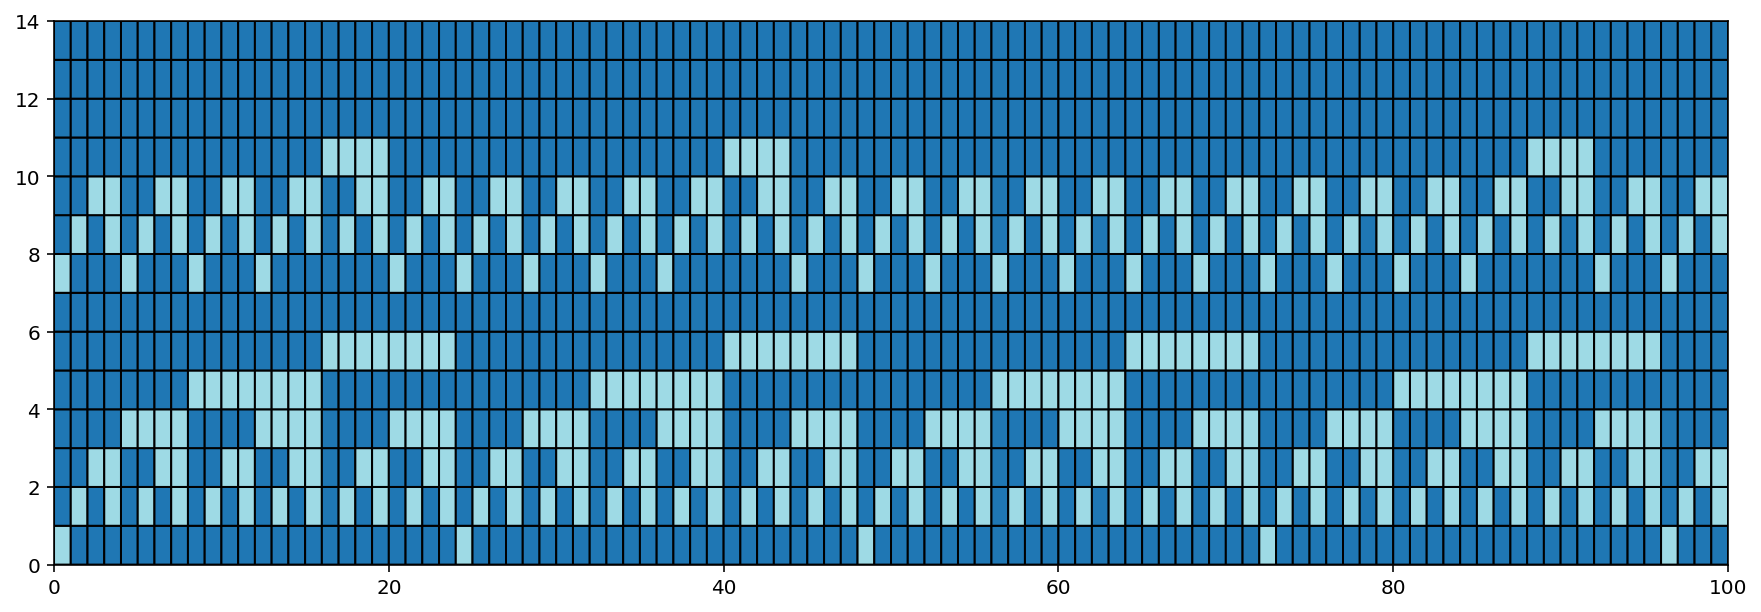

In [45]:
_plot_array(duration14.array)